<a href="https://colab.research.google.com/github/nvcaceres/Clase2/blob/master/Copia_de_minitarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [1]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño
print('\nTamaño y forma:\n{}\n{}'.format(datos.size, datos.shape))



Tamaño y forma:
37086
(5298, 7)


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

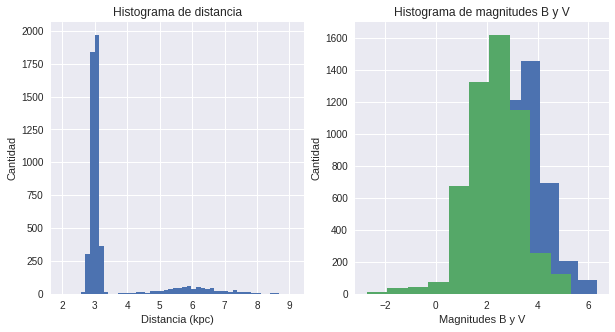

In [2]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
mB=datos[:,0].copy()
mV=datos[:,1].copy()
mR=datos[:,2].copy()
mI=datos[:,3].copy()
logTe=datos[:,4].copy()
Mass=datos[:,5].copy()
Distancia=datos[:,6].copy()

plt.subplot(121)
plt.hist(Distancia,bins=50)
plt.title("Histograma de distancia")
plt.xlabel('Distancia (kpc)')
plt.ylabel('Cantidad')

plt.subplot(122)
plt.hist(mB, )
plt.hist(mV)
plt.title("Histograma de magnitudes B y V")
plt.xlabel('Magnitudes B y V')
plt.ylabel('Cantidad')
plt.legend()


## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [3]:
#Filtrar por distancia
#Por los datos del histograma se filtrara entre 2.8 y 3.4
n=Distancia.size
datos_filtrados1=Distancia[Distancia>2.8]
datos_filtrados2=datos_filtrados1[datos_filtrados1<3.5]
p=datos_filtrados2.size

print('El set original contenia '+str(n)+' estrellas,luego de filtrar quedaron ' +str(p))


El set original contenia 5298 estrellas,luego de filtrar quedaron 4382


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [5]:
#Funcion mag_abs(mag, dist)
#Definamos las magnitudes pedidas como lo hace la funcion
#Para ello sacamos un promedio de las bandas de magnitud, para obtener la magnitud aparente(?)
#Y multiplicamos por 1000 la distancia, ya que esta en kiloparsec

mag_ap=(mV+mB+mR+mI)/4
dist=Distancia*1000
def mag_abs(mag_ap, dist):
    M=mag_ap - 5*np.log10(dist) + 5
    return M
print (mag_abs(mag_ap,dist))


[-11.8010933  -10.28173856 -11.50311476 ... -10.41668318  -9.53297768
 -10.55268837]


## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

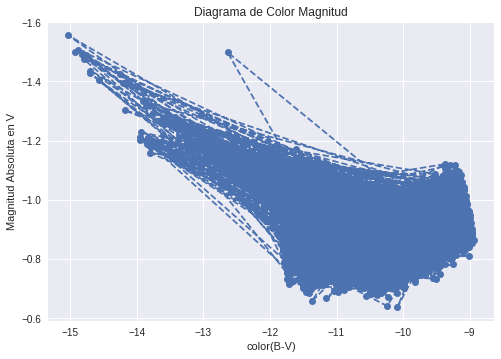

In [18]:
#Crear arrays MV y color
from matplotlib.pyplot import rcParams


#Utilizamos la funcion creada antes

MV=mag_abs(mV,dist)

#Realizamos una resta de arrays

color=mV-mB

#plot cmd

plt.plot(MV,color, 'o--',label='Poblacion de estrellas')
plt.title('Diagrama de Color Magnitud')
plt.xlabel('color(B-V)')
plt.ylabel('Magnitud Absoluta en V')
plt.gca().invert_yaxis() 




## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

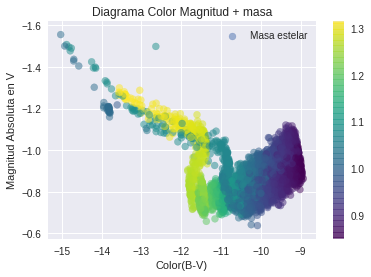

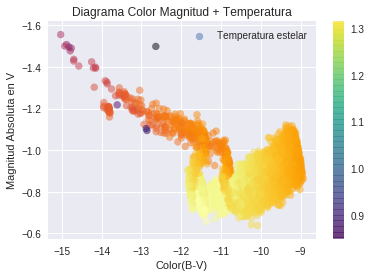

In [15]:
# plot cmd + masa / smd + temp

#ponerle colorsh

fig, ax = plt.subplots(figsize = (6,4))

cb = ax.scatter(MV, color, label = 'Masa estelar', c = Mass, alpha = 0.5,cmap='viridis')

fig.colorbar(cb)
ax.invert_yaxis()
ax.set_ylabel('Magnitud Absoluta en V')
ax.set_xlabel('Color(B-V)')
ax.set_title('Diagrama Color Magnitud + masa')
ax.legend()

fig, ax = plt.subplots(figsize = (6,4))

cb2 = ax.scatter(MV, color, label = 'Temperatura estelar', c =logTe , alpha = 0.5,cmap='inferno')

fig.colorbar(cb)
ax.invert_yaxis()
ax.set_ylabel('Magnitud Absoluta en V')
ax.set_xlabel('Color(B-V)')
ax.set_title('Diagrama Color Magnitud + Temperatura')
ax.legend()

(array([[  6.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   4.,   4.,  12.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   3.,  26.,   6.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   0.,   1.,  14.,  22.,   2.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   3.,  44.,  12.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  31.,  99.,  37.,  89., 254.,  47.],
        [  0.,   0.,   0.,   0.,   0.,  33.,  50., 134., 599.,  34.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  33., 394., 685.,  66.],
        [  0.,   0.,   0.,   0.,   0.,  27., 363., 637., 298.,  13.],
        [  0.,   0.,   0.,   0.,   7., 258., 560., 340.,  46.,   0.]]),
 array([-15.0313024 , -14.42122961, -13.81115681, -13.20108402,
        -12.59101122, -11.98093843, -11.37086563, -10.76079284,
        -10.15072004,  -9.54064725,  -8.93057445]),
 array([-1.55560606, -1.46373556, -1.37186506, -1.27999455, -1.18812405,
        -1.09625354, -1.00438304, -0.91251254

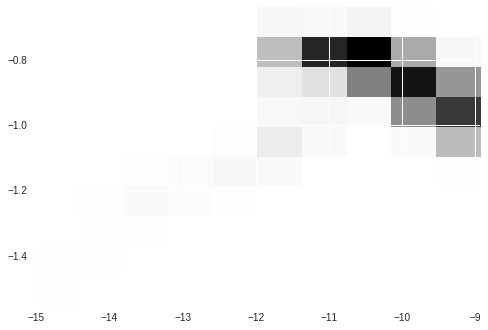

In [22]:
# plot cmd hist2D

plt.hist2d(MV,color)
